# Dataset analysis
**Copyright 2023 (c) Naomi Chaix-Echel & Nicolas P Rougier**  
Released under a BSD 2-clauses license

## Common packages / functions

In [1]:
%run "00-common.ipynb"

## Load data

In [2]:
data = pd.read_csv("./data/data-processed.csv", parse_dates=["date"])
subject_ids = data['subject_id'].unique()
valid_ids, reject_ids = filter_subjects(data)
date_start, date_end = data["date"].min(), data["date"].max()
task_ids = list(range(1,8))

## Measuring attitude towards risk for gain and loss

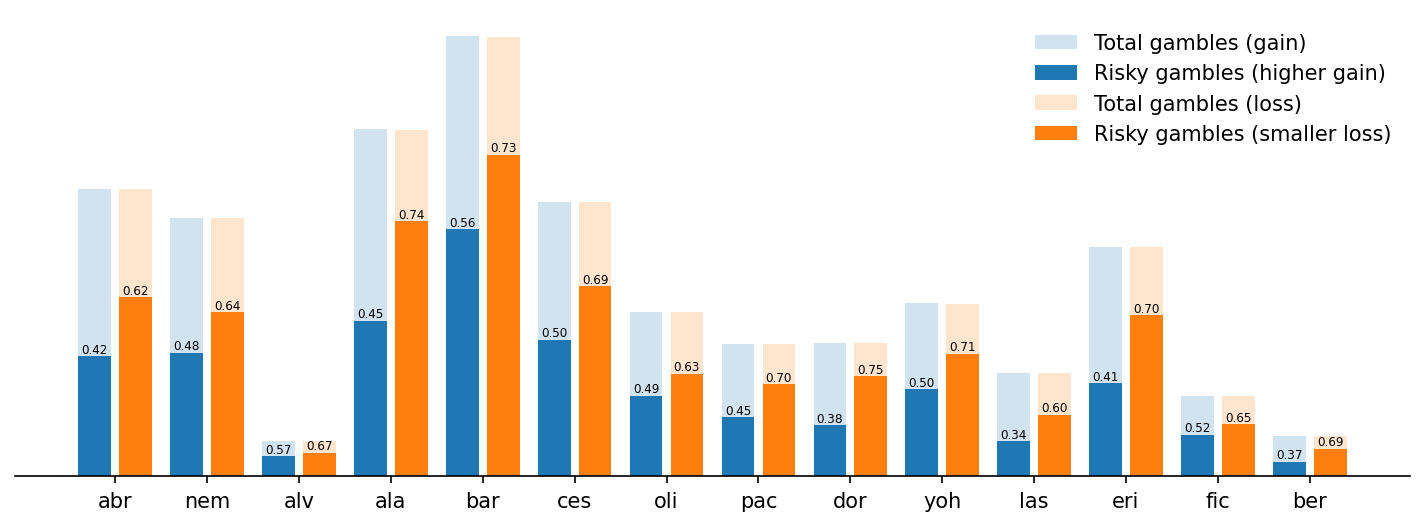

In [3]:
X = 2.25*np.arange(len(valid_ids))
fig = plt.figure(figsize=(12,4), dpi=150)
ax = plt.subplot(1,1,1)

task_id = 6
total_gambles, risky_gambles = [], []
for subject_id in valid_ids:
    R = convert_trials(data, subject_id, task_id)["response"]
    total_gambles.append(R.size)
    risky_gambles.append(R.sum())
total_gambles= np.array(total_gambles)
risky_gambles= np.array(risky_gambles)

ax.bar(X, total_gambles, alpha=.2, color="C0", label="Total gambles (gain)")
bar = ax.bar(X, risky_gambles, color="C0", label="Risky gambles (higher gain)")
ax.bar_label(bar, labels = ["%.2f" % r for r in risky_gambles/total_gambles],
             label_type='edge', fontsize="xx-small", color="black")


task_id = 7
total_gambles, risky_gambles = [], []
for subject_id in valid_ids:
    R = convert_trials(data, subject_id, task_id)["response"]
    total_gambles.append(R.size)
    risky_gambles.append(R.sum())   
total_gambles= np.array(total_gambles)
risky_gambles= np.array(risky_gambles)

ax.bar(X+1, total_gambles, alpha=.2, color="C1", label="Total gambles (loss)")
bar = ax.bar(X+1, risky_gambles, color="C1", label="Risky gambles (smaller loss)")
ax.bar_label(bar, labels = ["%.2f" % r for r in risky_gambles/total_gambles],
             label_type='edge', fontsize="xx-small", color="black")


ax.set_xticks(X+0.5)
ax.set_xticklabels(valid_ids)
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.legend(frameon=False);

## Prepare data

In [4]:
index = pd.date_range(start=date_start, end=date_end, freq="W-Mon");

## Mean gain (per week)

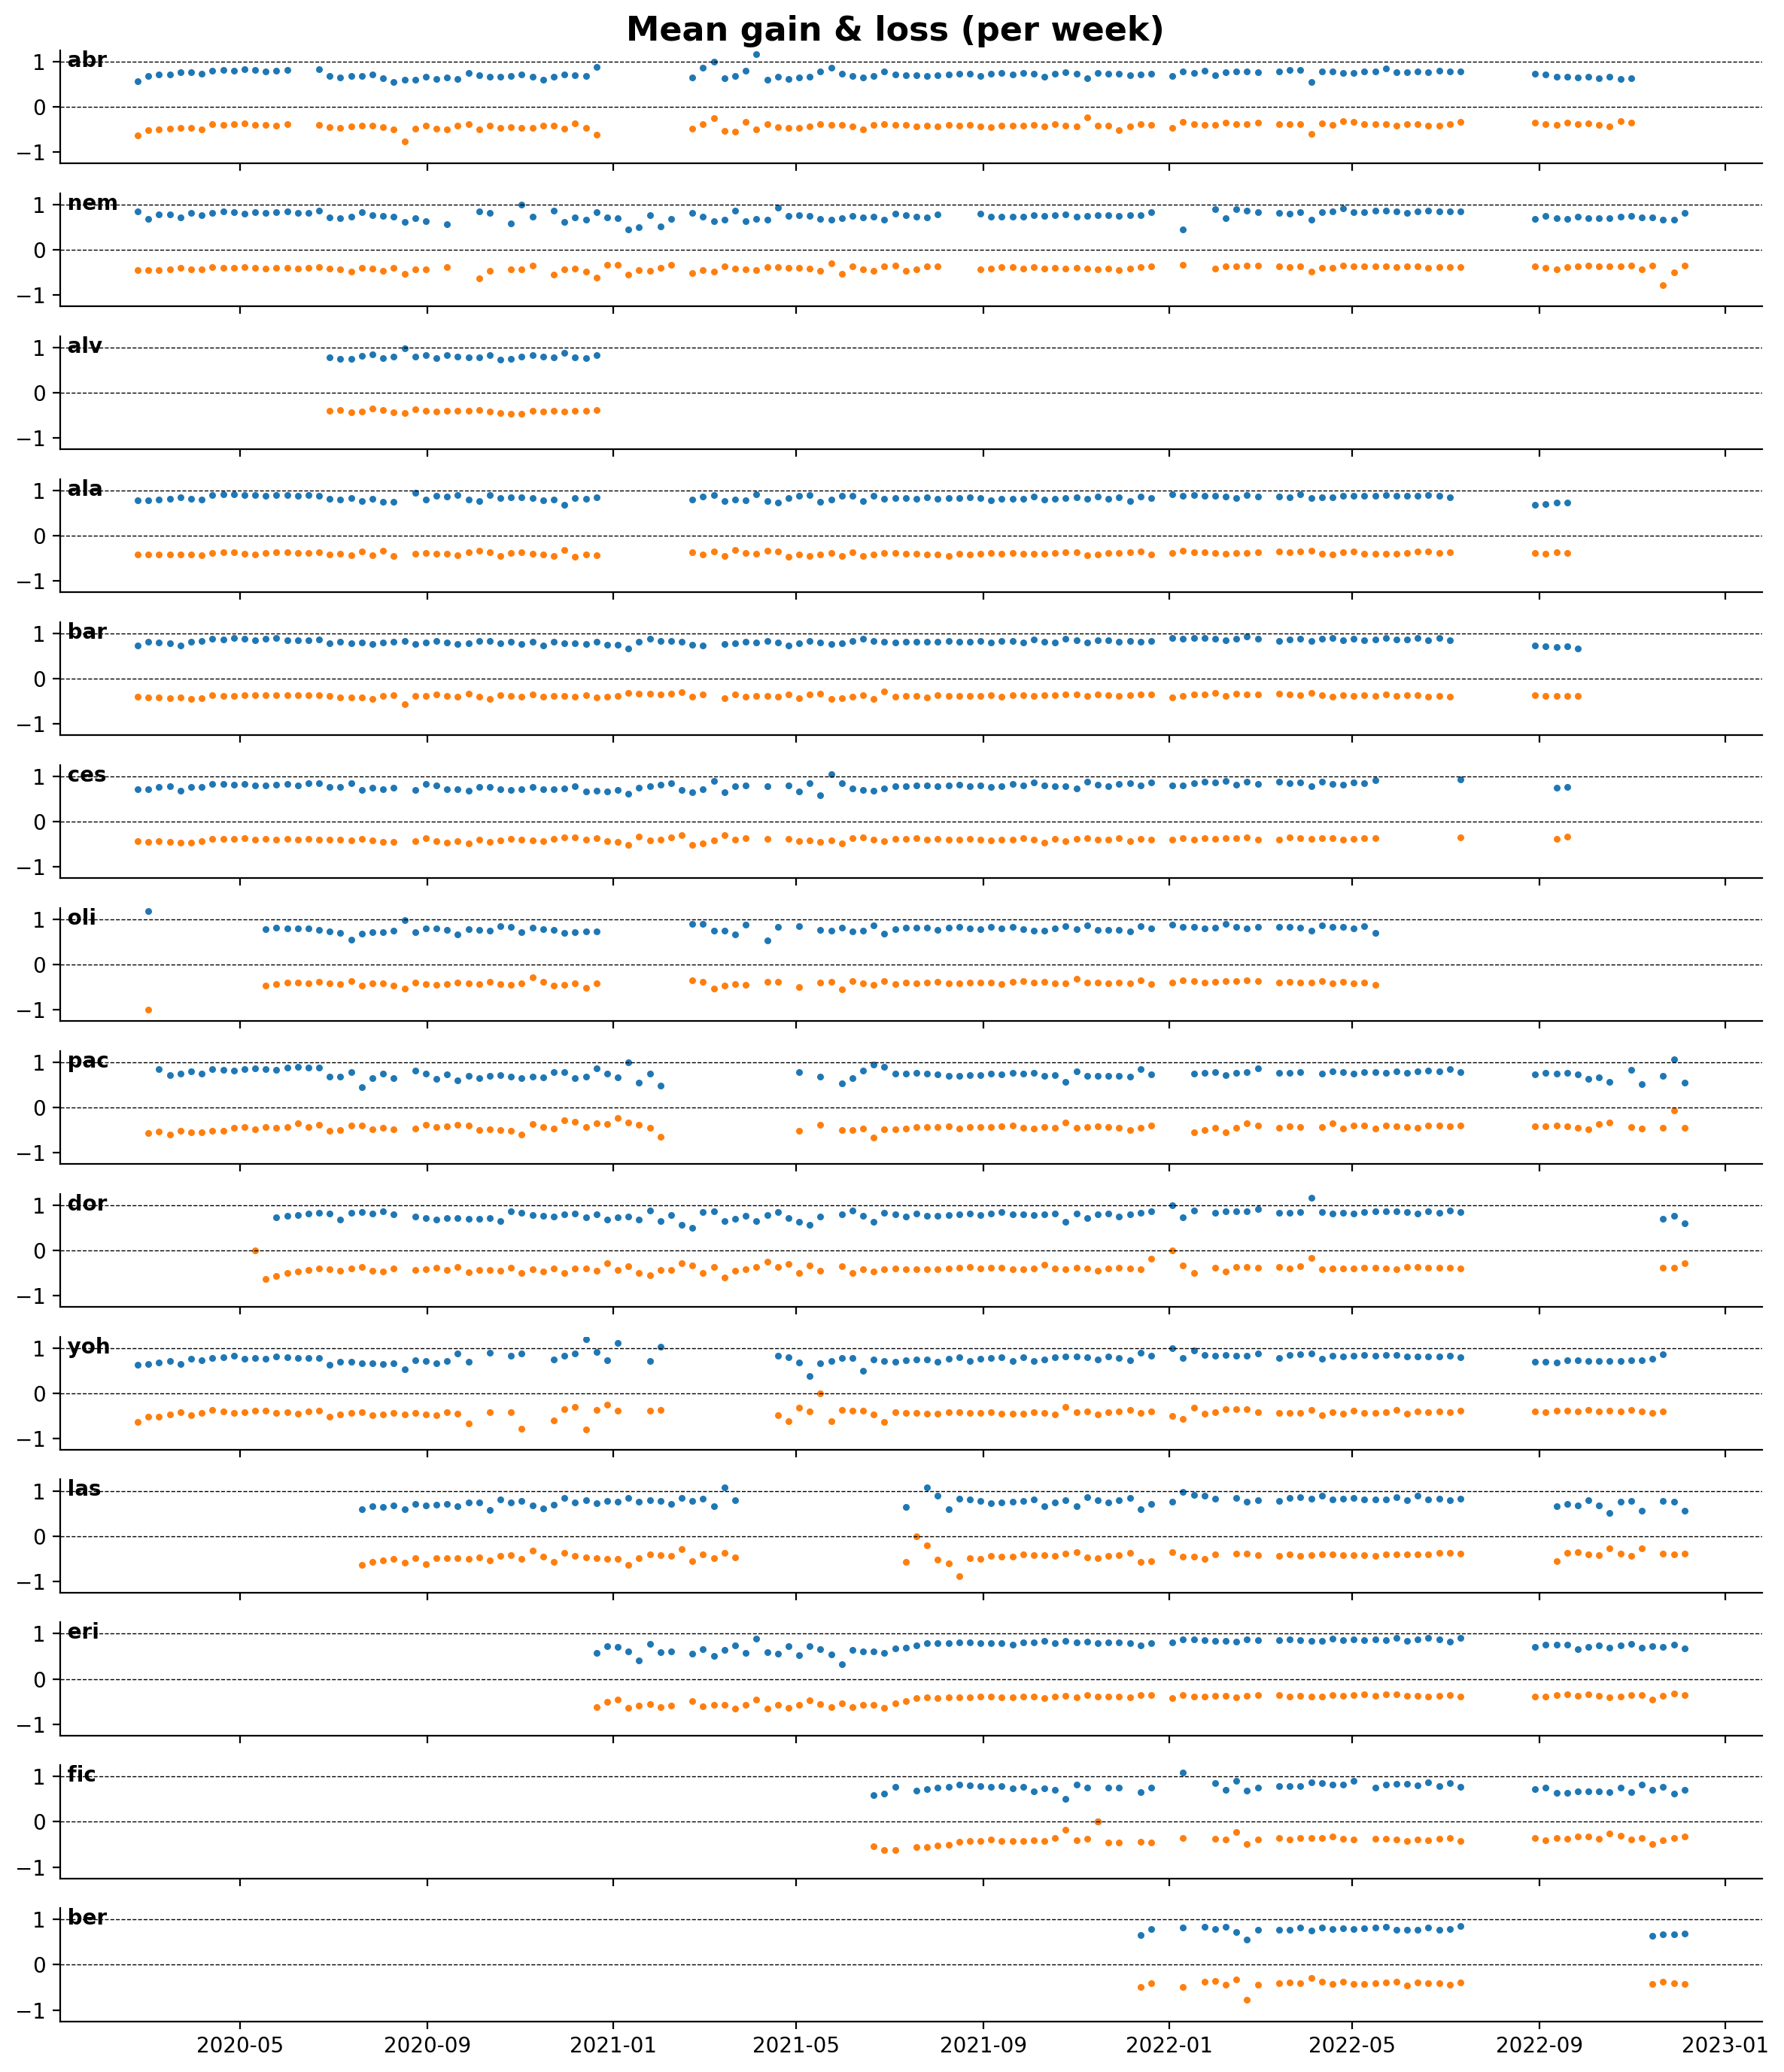

In [5]:
n = len(valid_ids)

fig, axs = plt.subplots(n, 1, figsize=(12,n), dpi=200, sharex=True)
fig.suptitle("Mean gain & loss (per week)", fontsize=16, fontweight="bold")

for i,subject_id in enumerate(valid_ids):
    trials = select_trials(data, subject_id).copy()
    G = trials[["date", "gain"]].resample('W-Mon', on='date').mean()
    L = trials[["date", "loss"]].resample('W-Mon', on='date').mean()

    ax = axs[i]   
    ax.text(0, 1, " " + subject_id, fontweight="bold",
            transform=ax.transAxes, ha="left", va="top")
        
    ax.scatter(G.index, G, s=5, color="C0")
    ax.scatter(G.index, L, s=5, color="C1")
    
    ax.set_ylim(-1.25, 1.25)
    ax.set_yticks([-1, 0, 1])
    ax.axhline(1, color="black", lw=0.5, ls="--")
    ax.axhline(0, color="black", lw=0.5, ls="--")
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
plt.tight_layout()

## Normalized risky/safe bet ratio (per week)

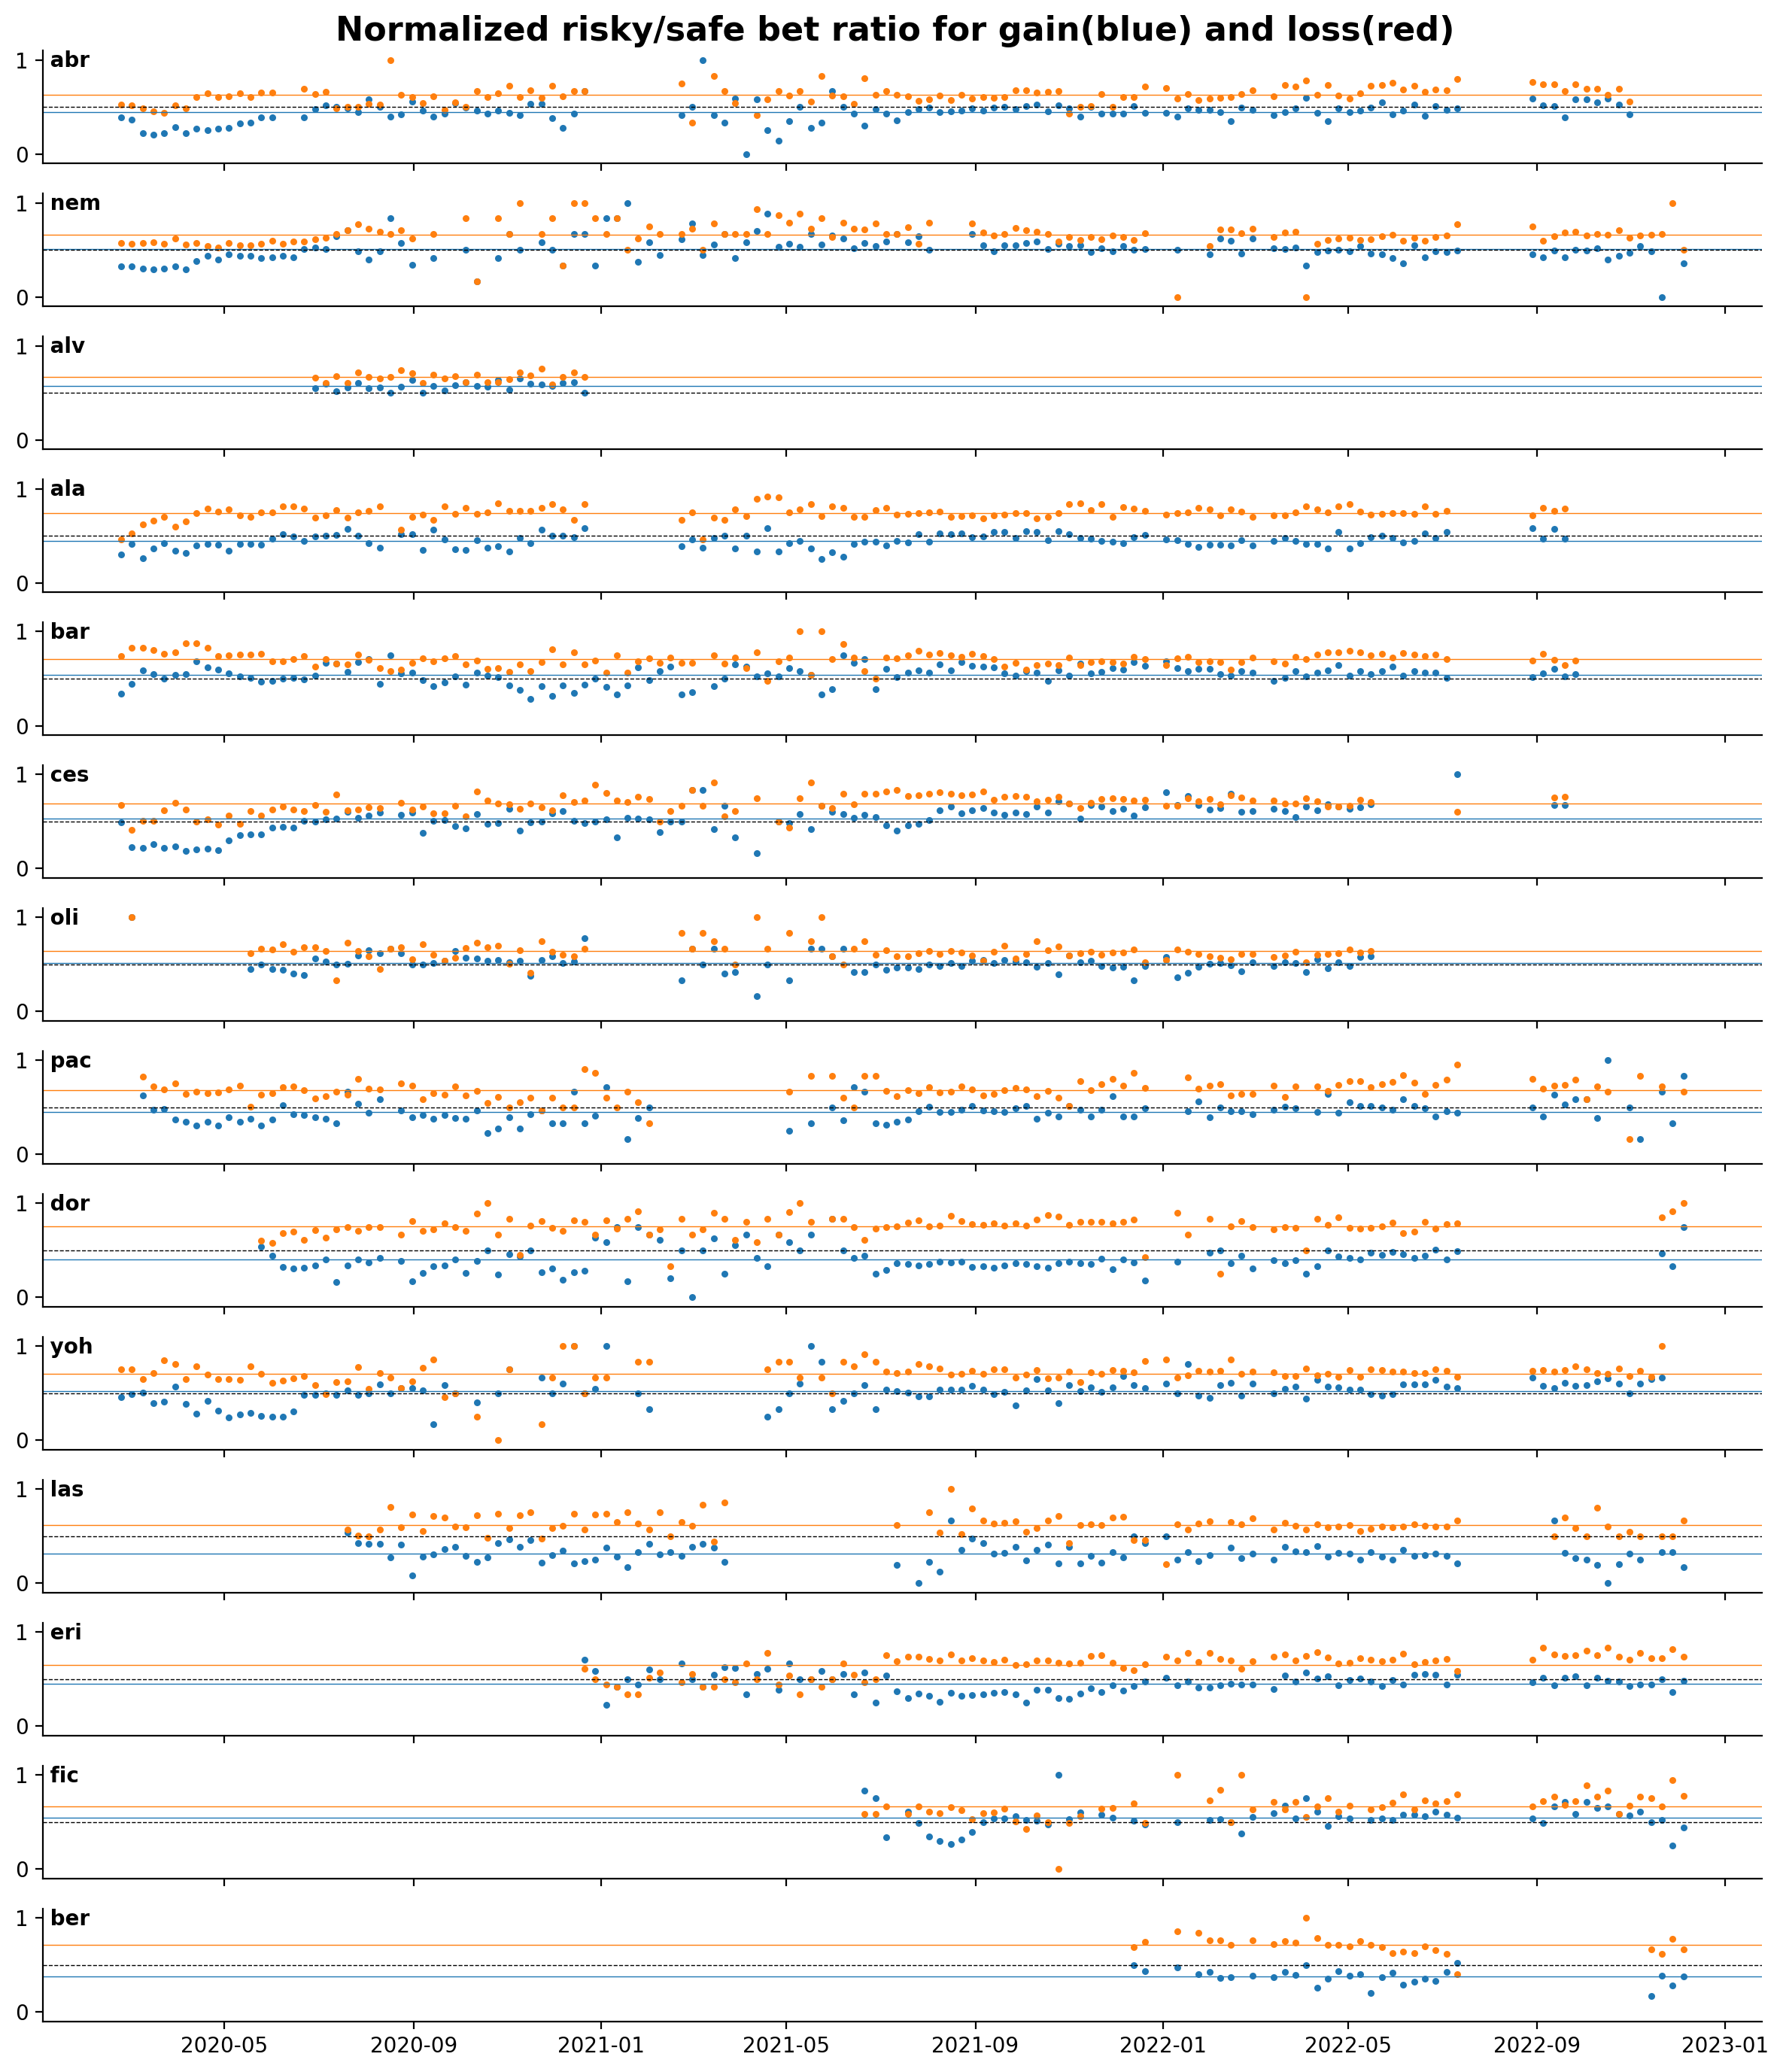

In [6]:
n = len(valid_ids)
fig, axs = plt.subplots(n, 1, figsize=(12,n), dpi=200, sharex=True)

fig.suptitle("Normalized risky/safe bet ratio for gain(blue) and loss(red)", fontsize=16, fontweight="bold")

for i,subject_id in enumerate(valid_ids):
    ax = axs[i]
    T = convert_trials(data, subject_id, 6)[["date", "response"]]
    risky = T.resample('W-Mon', on='date').sum()
    total = T.resample('W-Mon', on='date').count()
    X, Y = np.array(risky.index), np.array(risky/total)
    ax.scatter(X, Y, s=5, color="C0")
    ax.axhline(np.nanmean(Y), color="C0", lw=0.5, ls="-")

    T = convert_trials(data, subject_id, 7)[["date", "response"]]
    trial = T[["date", "response"]]
    risky = T.resample('W-Mon', on='date').sum()
    total = T.resample('W-Mon', on='date').count()
    X, Y = np.array(risky.index), np.array(risky/total)
    ax.scatter(X, Y, s=5, color="C1")
    ax.axhline(np.nanmean(Y), color="C1", lw=0.5, ls="-")


    ax.text(0, 1, " " + subject_id, fontweight="bold",
            transform=ax.transAxes, ha="left", va="top")
    ax.set_ylim(-0.1,1.1)
    ax.set_yticks([0,1])
    ax.axhline(0.5, color="black", lw=0.5, ls="--")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
plt.tight_layout()

## Mean reaction time (per week)

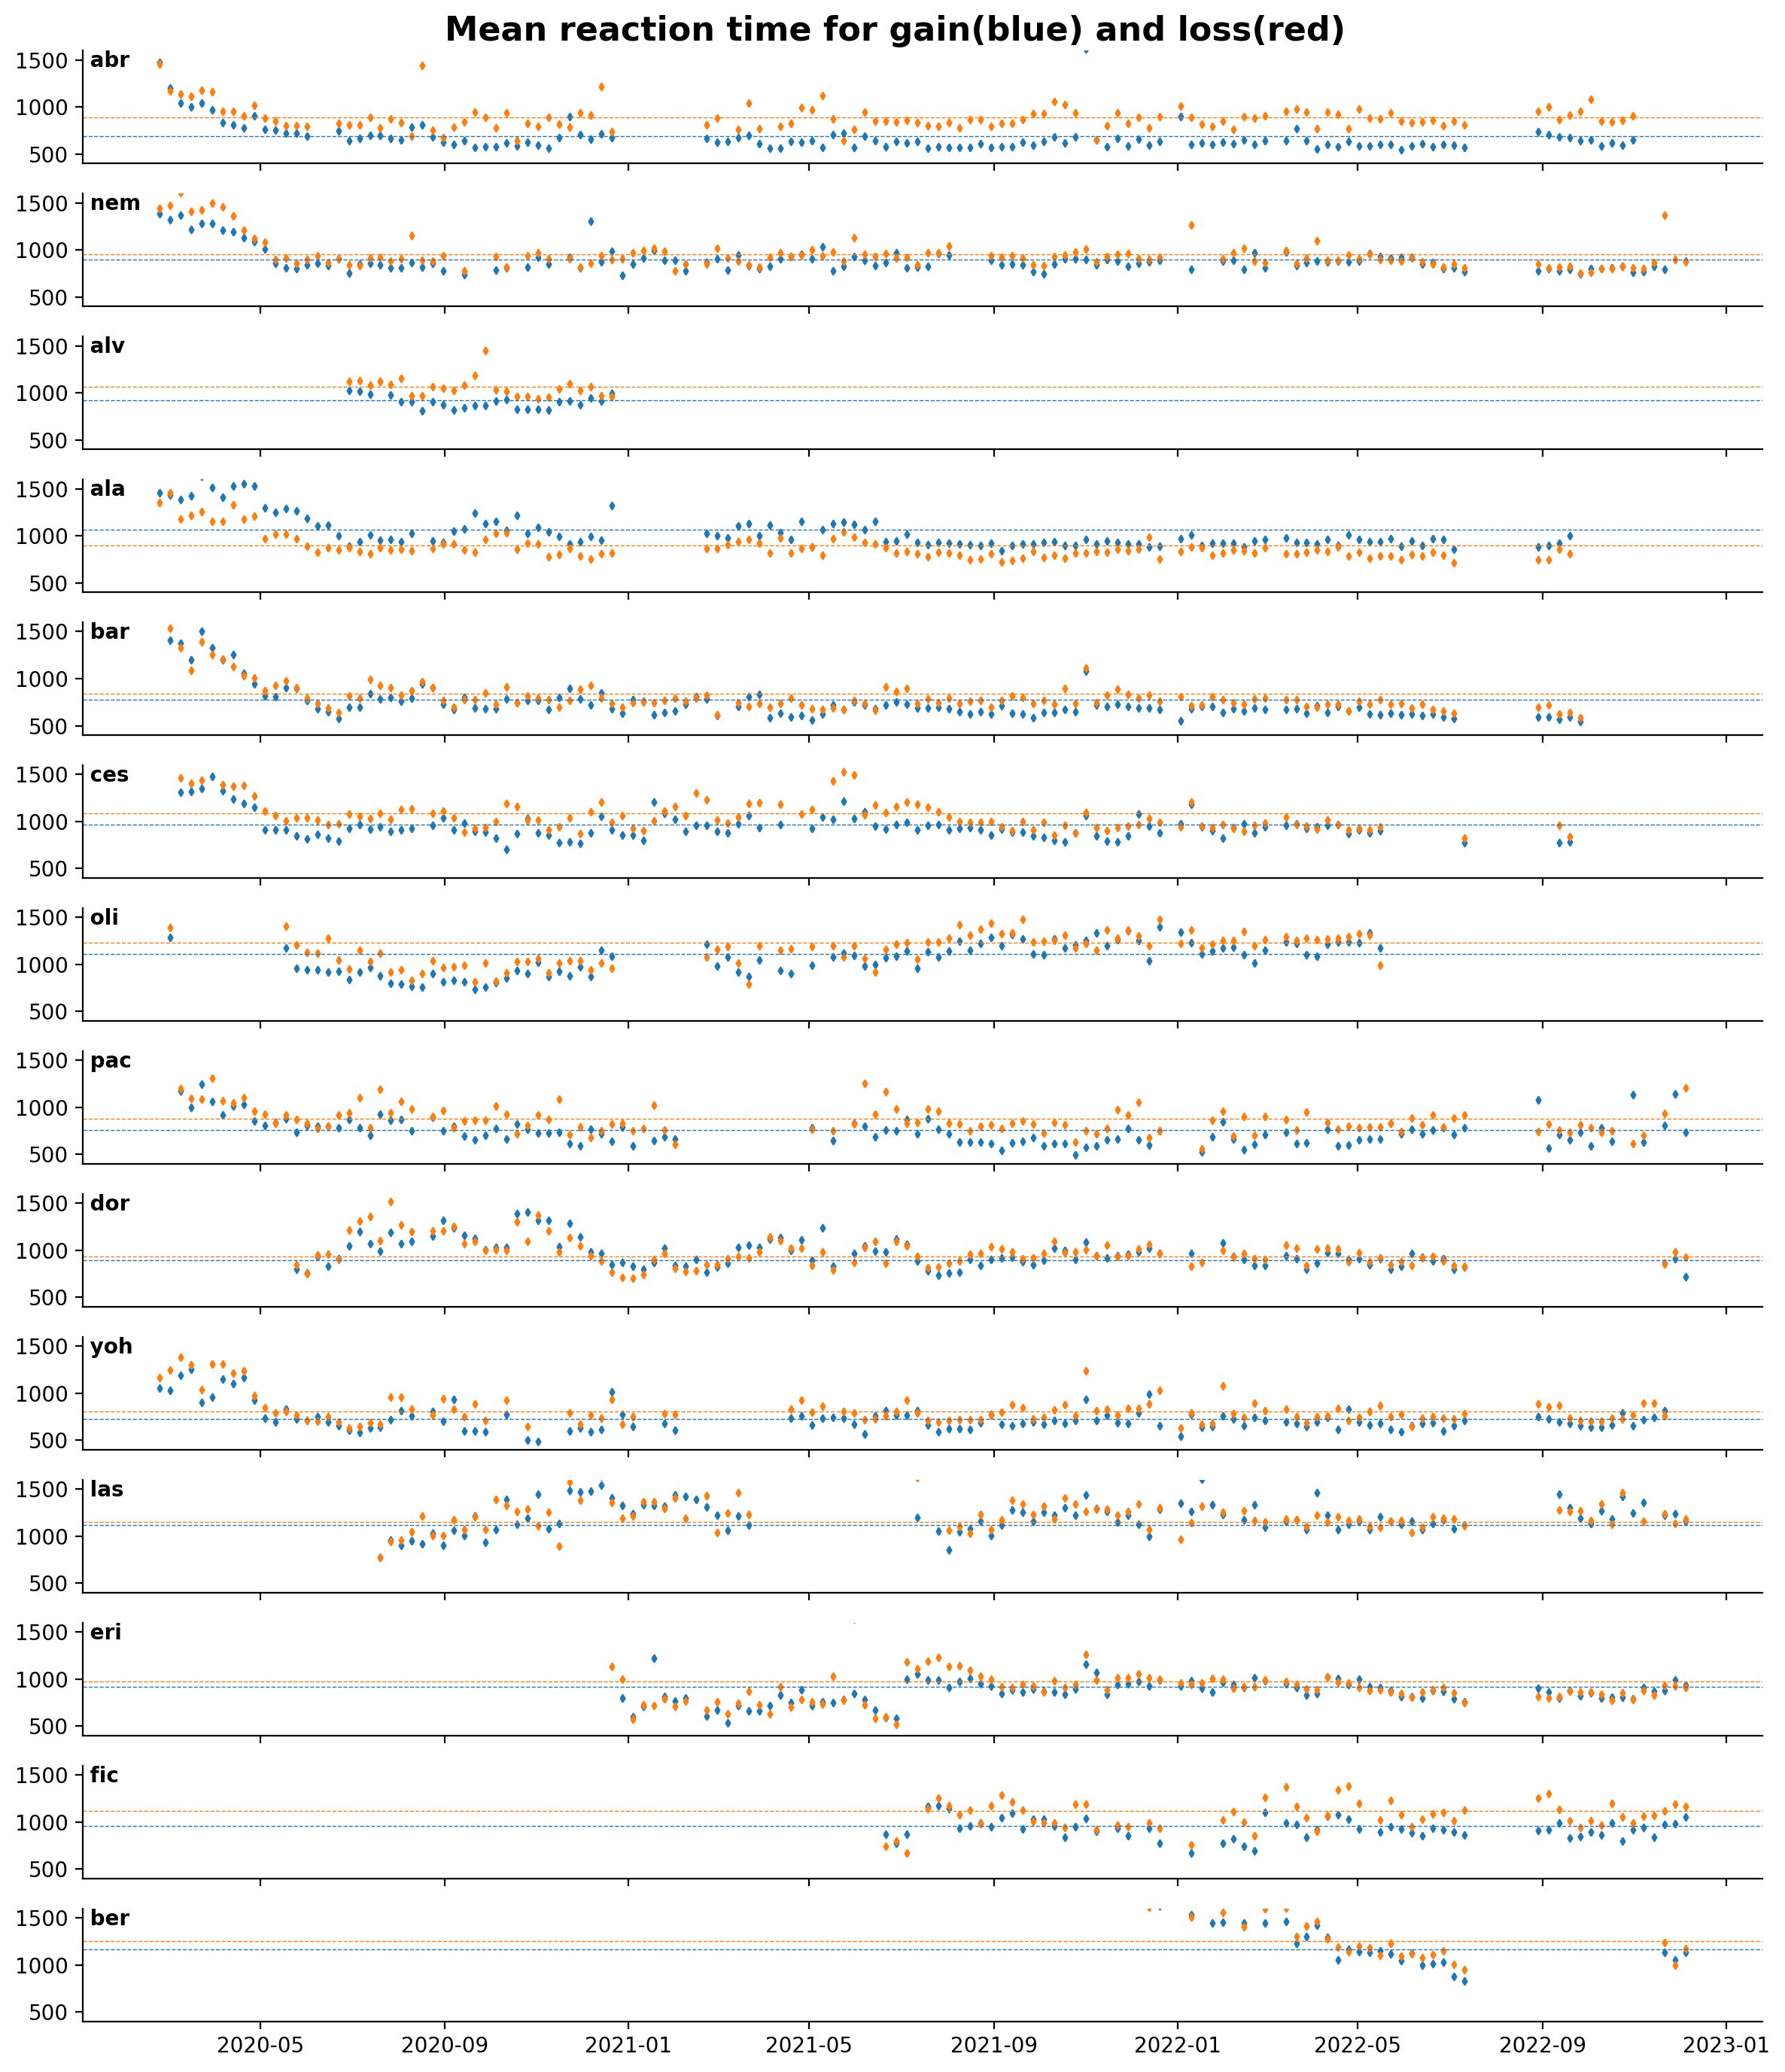

In [7]:

n = len(valid_ids)
fig, axs = plt.subplots(n, 1, figsize=(12,n), dpi=200, sharex=True, sharey=True)
fig.suptitle("Mean reaction time for gain(blue) and loss(red)", fontsize=16, fontweight="bold")

for i,subject_id in enumerate(valid_ids):
    ax = axs[i]

    T = convert_trials(data, subject_id, 6)[["date", "RT"]]
    RT_mean = T["RT"].mean()
    RT = T.resample('W-Mon', on='date').mean()
    ax.scatter(np.array(RT.index), RT, s=5, color="C0", marker="d")
    ax.axhline(RT_mean, color="C0", lw=0.5, ls="--")
    # xmin, xmax = ax.get_xlim()
    # ax.text(xmin, RT_mean, " %.1f" % RT_mean, ha="left", va="bottom", color="C0", fontsize="x-small")

    T = convert_trials(data, subject_id, 7)[["date", "RT"]]
    RT_mean = T["RT"].mean()
    RT = T.resample('W-Mon', on='date').mean()
    ax.scatter(np.array(RT.index), RT, s=5, color="C1", marker="d")
    ax.axhline(RT_mean, color="C1", lw=0.5, ls="--")

    ax.text(0, 1, " " + subject_id, fontweight="bold",
            transform=ax.transAxes, ha="left", va="top")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # We set y limits manualy to avoid flattening eveyrhting due to outliers
    # This means we lose a few points but it eases the reading of the figure
    ax.set_ylim(400,1600)
    
plt.tight_layout()

## Evolution of ELO score and rank

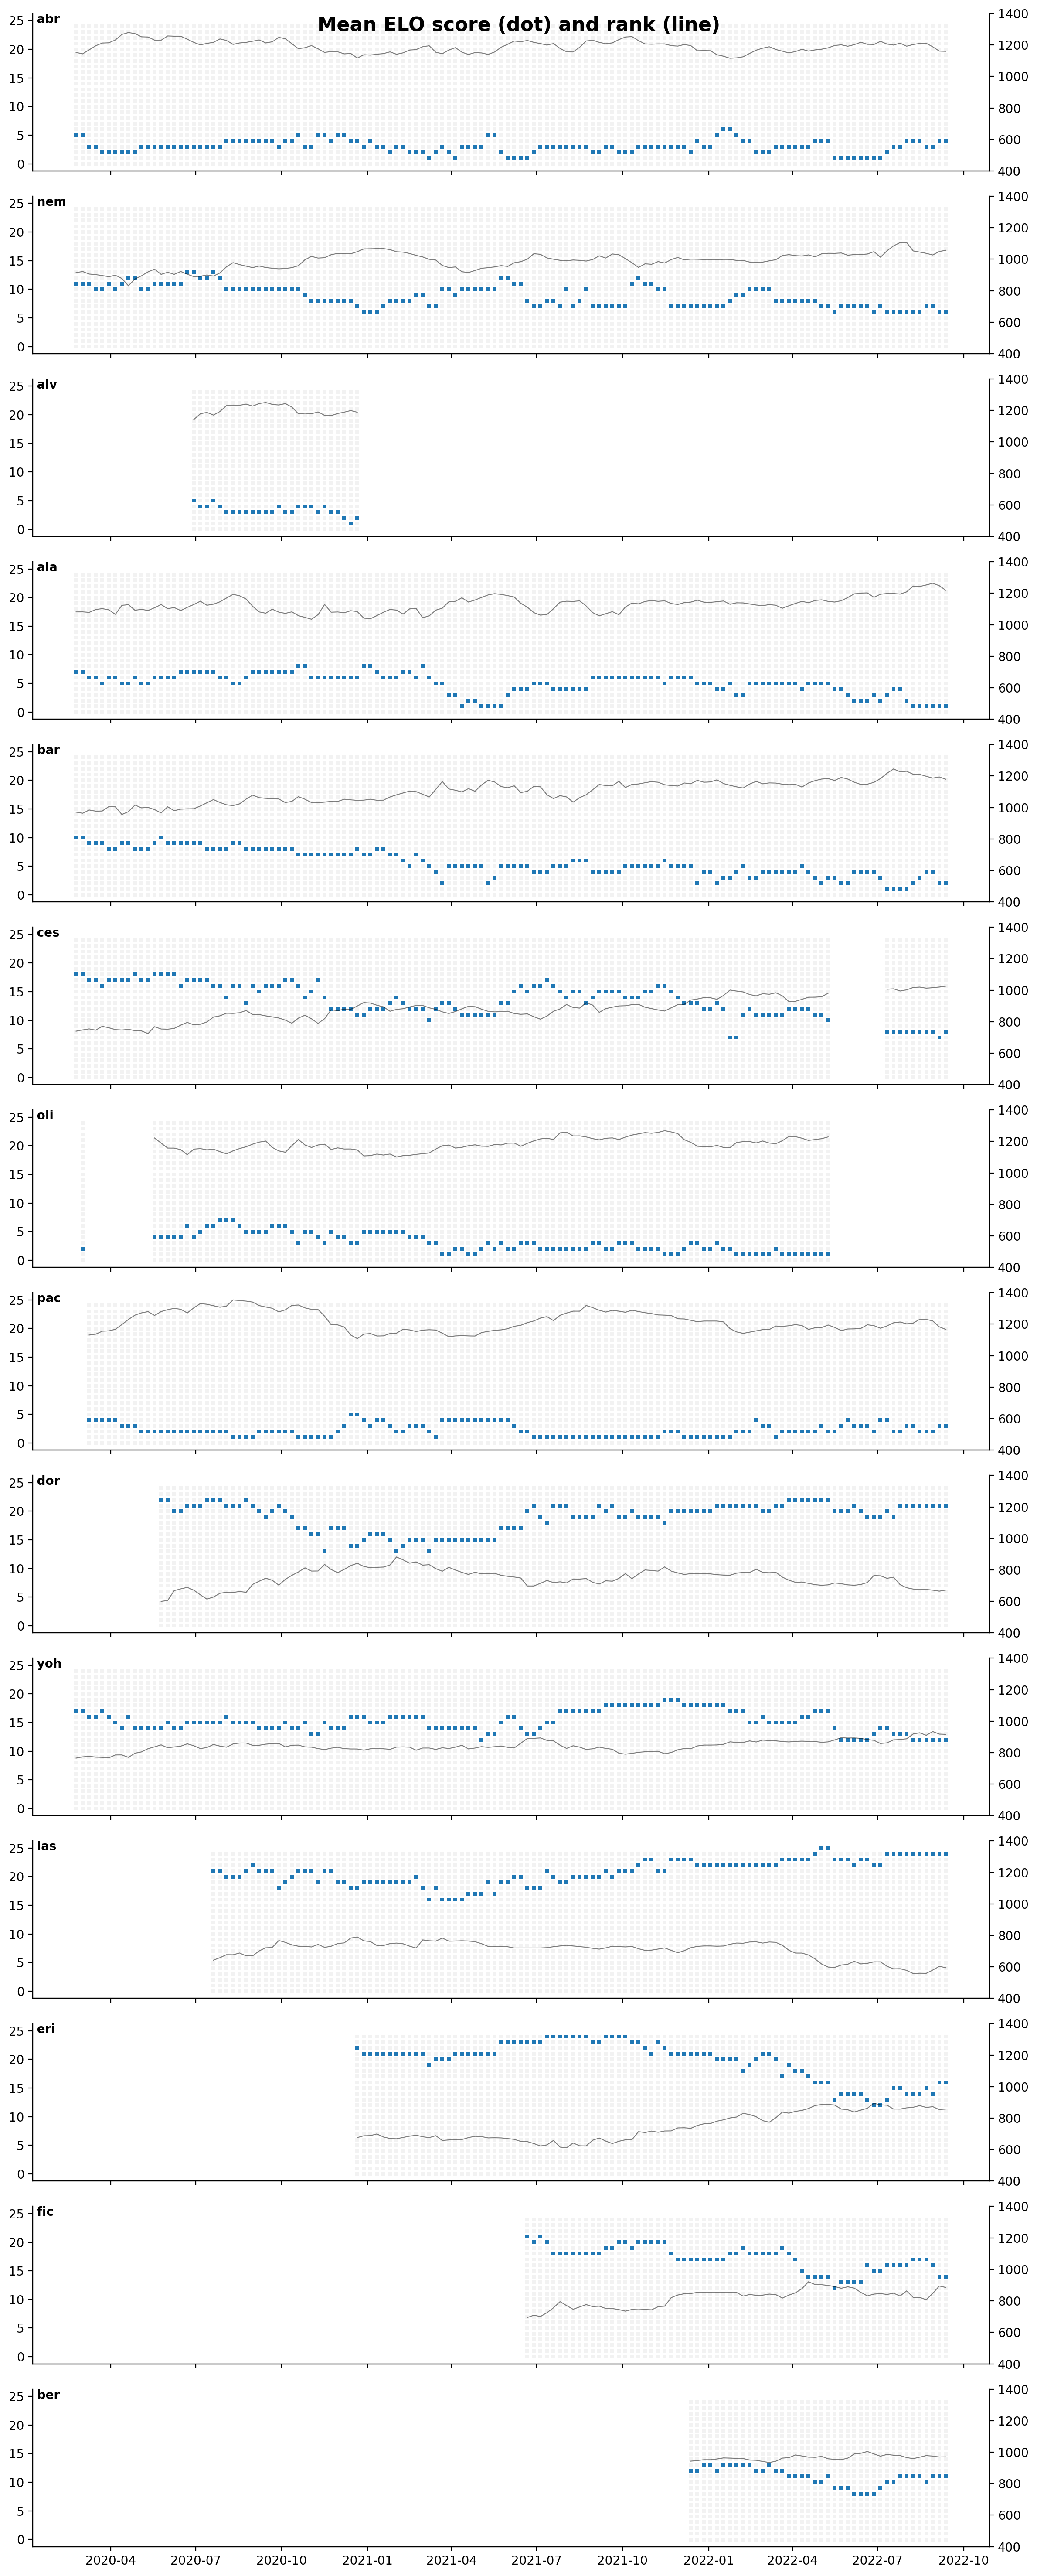

In [8]:
# Read elo scores and resample them per week (taking mean)
ELO = pd.read_excel('./data/elo-scores.xlsx', parse_dates=["Date"])
ELO = ELO.resample('W-Mon', on='Date').mean()

# Compute ELO ranks
RANK = ELO.assign(**ELO.iloc[:, :].rank(axis = 1, na_option='keep', method='min', ascending = False))


# ELO rank per week
n = len(valid_ids)
fig, axs = plt.subplots(n, 1, figsize=(12,2*n+2), dpi=200, sharex=True, sharey=True)
fig.suptitle("Mean ELO score (dot) and rank (line)", fontsize=16, fontweight="bold")

for i,subject_id in enumerate(valid_ids):
    ax = axs[i]

    T = convert_trials(data, subject_id, 6)[["date", "RT"]]
    RT_mean = T["RT"].mean()
    RT = T.resample('W-Mon', on='date').mean()
    I = ELO.index.intersection(RT.index)

    # We could do much better than an iteration...
    for j in range(25):
        ax.scatter(I, j+0*RANK[subject_id].loc[I], s=10,
                   facecolor="black", edgecolor="None", marker="s", alpha=.05)
    
    ax.scatter(I, RANK[subject_id].loc[I], s=10, facecolor="C0", marker="s", edgecolor="None")
    # ax.axhline(10, color="C0", lw=0.5, ls="--")
    
    ax.text(0, 1, " " + subject_id, fontweight="bold",
            transform=ax.transAxes, ha="left", va="top")
    ax.spines["top"].set_visible(False)

    ax2 = ax.twinx()  
    ax2.plot(I, ELO[subject_id].loc[I], color="black", lw=0.75, alpha=0.5)
    ax2.spines["top"].set_visible(False)
    ax2.set_ylim(400, 1400)

plt.tight_layout()

KeyError: "[Timestamp('2020-08-17 00:00:00'), Timestamp('2021-12-27 00:00:00'), Timestamp('2022-03-07 00:00:00'), Timestamp('2022-07-18 00:00:00'), Timestamp('2022-07-25 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-08-08 00:00:00'), Timestamp('2022-08-15 00:00:00'), Timestamp('2022-08-22 00:00:00')] not in index"

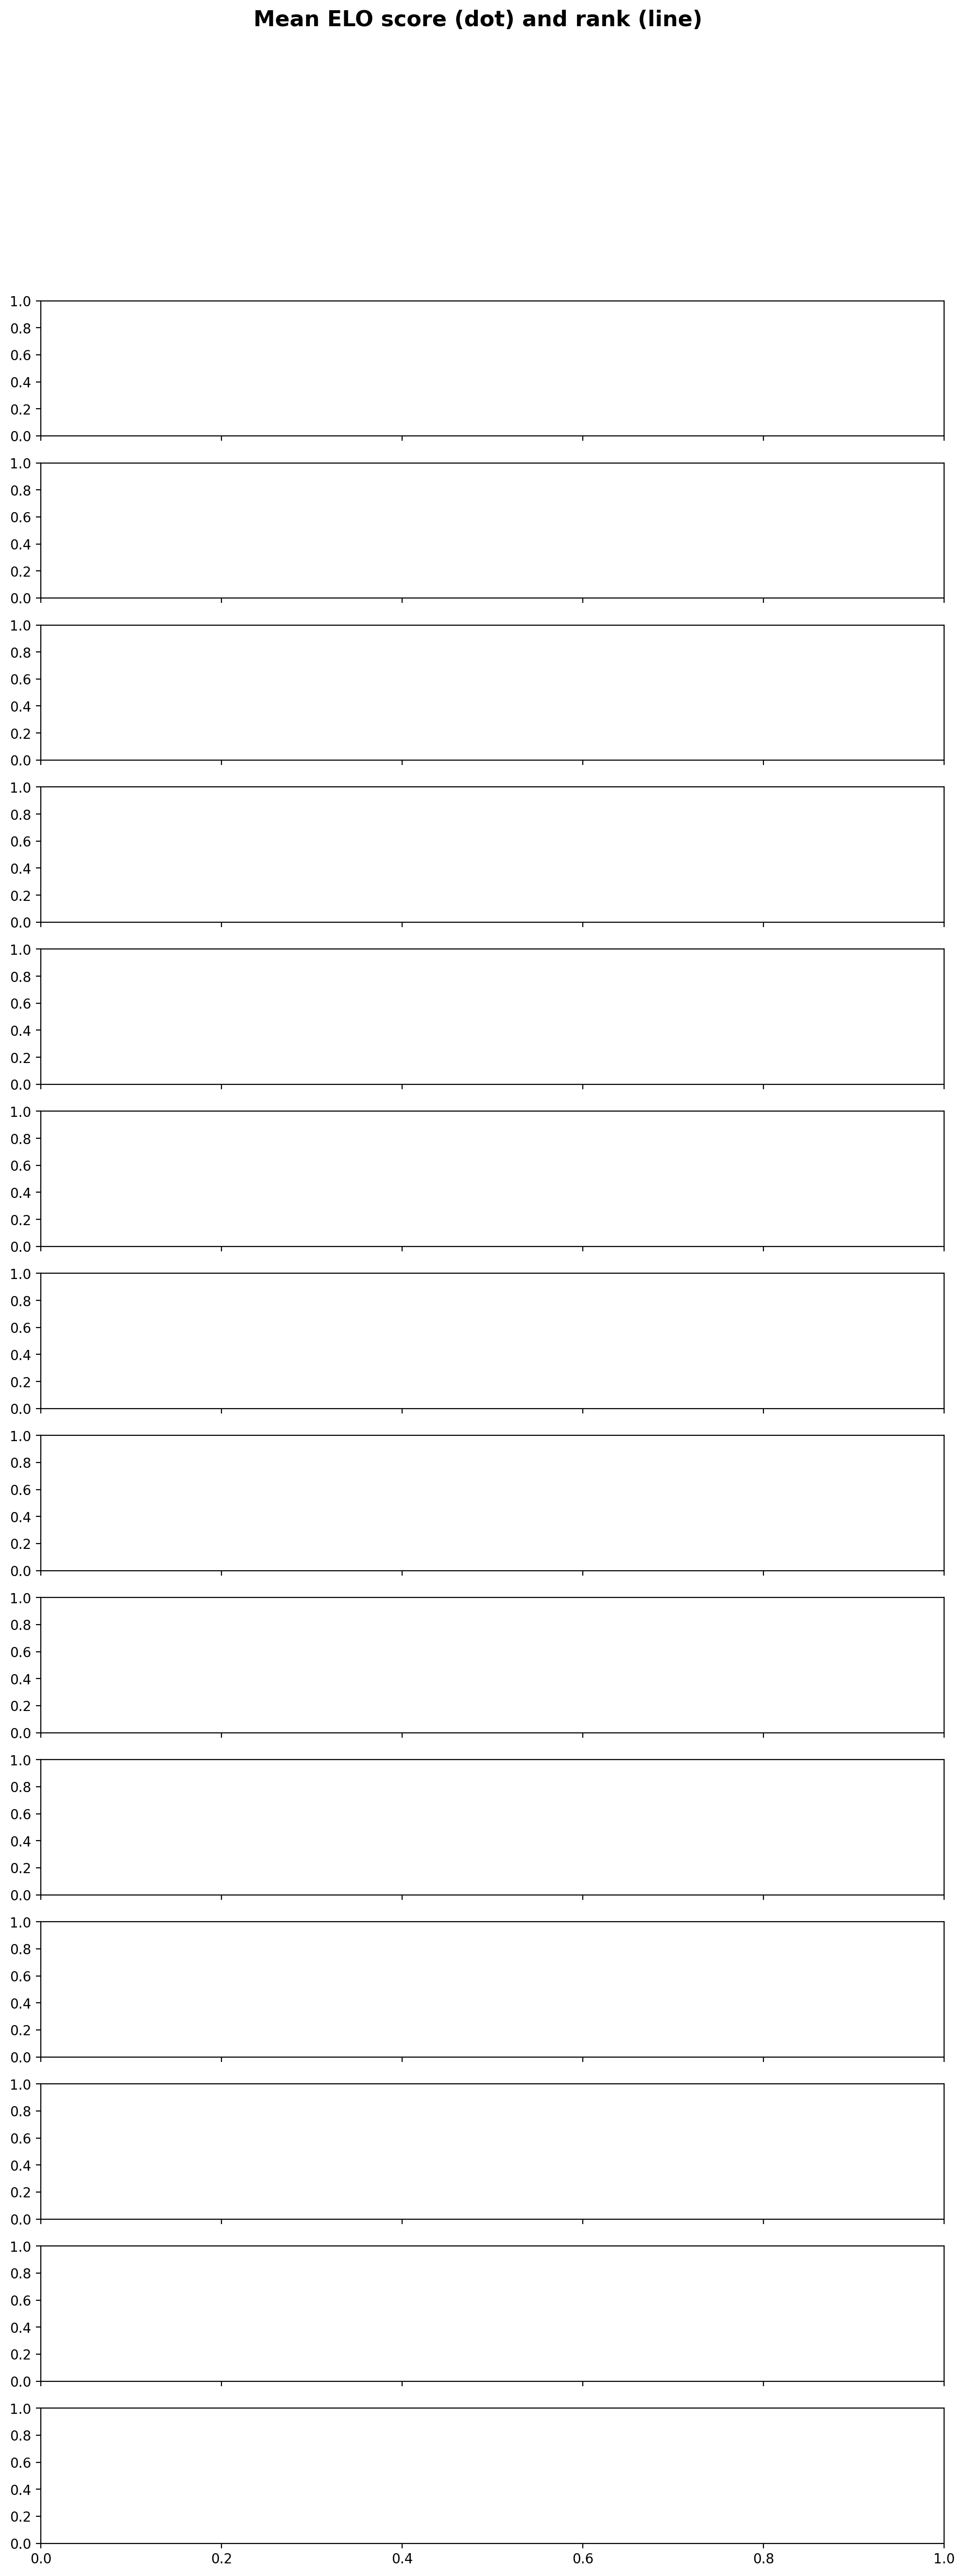

In [9]:
# TEST

# Read elo scores and resample them per week (taking mean)
# ELO = pd.read_excel('./data/elo-scores.xlsx', parse_dates=["Date"])

#ELO = data
#ELO.pivot_table(values='gain', index=ELO["date"], columns='subject_id', aggfunc='first')
#ELO = ELO.resample('W-Mon', on='date').mean()


# Compute ELO ranks
#RANK = ELO.assign(**ELO.iloc[:, :].rank(axis = 0, na_option='keep', method='min', ascending = False))

df = data
G = df.pivot_table(values='gain', index=df["date"], columns='subject_id', aggfunc='first')
G.resample('W-Mon').mean()
RANK = G.assign(**G.iloc[:, :].rank(axis = 1, na_option='keep', method='min', ascending = False))


# ELO rank per week
n = len(valid_ids)
fig, axs = plt.subplots(n, 1, figsize=(12,2*n+2), dpi=200, sharex=True, sharey=True)
fig.suptitle("Mean ELO score (dot) and rank (line)", fontsize=16, fontweight="bold")

for i,subject_id in enumerate(valid_ids):
    ax = axs[i]

    T = convert_trials(data, subject_id, 6)[["date", "RT"]]
    RT_mean = T["RT"].mean()
    RT = T.resample('W-Mon', on='date').mean()
    I = ELO.index.intersection(RT.index)

    # We could do much better than an iteration...
    for j in range(25):
        ax.scatter(I, j+0*RANK[subject_id].loc[I], s=10,
                   facecolor="black", edgecolor="None", marker="s", alpha=.05)
    
    ax.scatter(I, RANK[subject_id].loc[I], s=10, facecolor="C0", marker="s", edgecolor="None")
    # ax.axhline(10, color="C0", lw=0.5, ls="--")
    
    ax.text(0, 1, " " + subject_id, fontweight="bold",
            transform=ax.transAxes, ha="left", va="top")
    ax.spines["top"].set_visible(False)

    ax2 = ax.twinx()  
    ax2.plot(I, ELO[subject_id].loc[I], color="black", lw=0.75, alpha=0.5)
    ax2.spines["top"].set_visible(False)
    ax2.set_ylim(400, 1400)

plt.tight_layout()

## Debug

In [ ]:
ELO = pd.read_excel('./data/elo-scores.xlsx', parse_dates=["Date"])
# ELO

In [ ]:
df = data[["date", "subject_id", "gain"]]
G = df.pivot_table(values='gain', index=df["date"], columns='subject_id', aggfunc='first')
GG = G.resample('W-Mon').sum()
# GG.head()
# RANK = GG.assign(**GG.iloc[:, :].rank(axis = 1, na_option='keep', method='min', ascending = False))

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(12,2), dpi=200, sharex=True, sharey=True)
plt.scatter(GG.index, GG["dor"])

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(12,2), dpi=200, sharex=True, sharey=True)
plt.scatter(GG.index, GG["ala"])